### **Importing Packages**



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

### **Load Data**

In [ ]:
# loading the dataset 
data = pd.read_csv('/content/insurance.csv')

In [ ]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


### **Exploratory Data Analysis (EDA)**

In [ ]:
data.shape

(1338, 7)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### **Data Visualization**

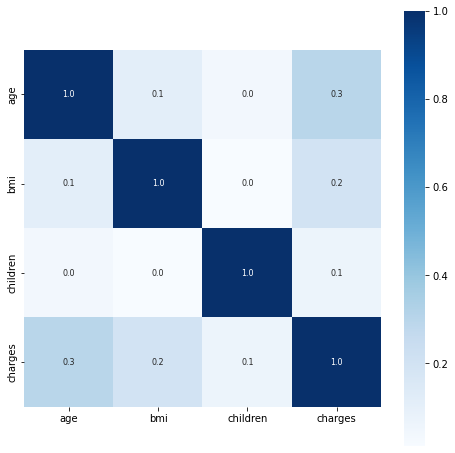

In [ ]:
# constructing a heatmap to understand the correlatiom
plt.figure(figsize = (8,8))
sns.heatmap(data.corr(), cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

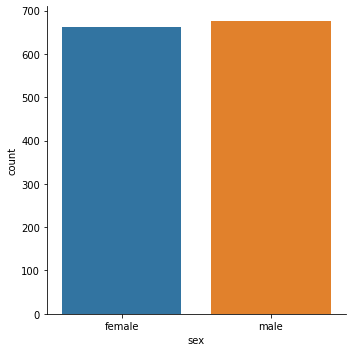

In [ ]:
sns.catplot(x='sex', data = data, kind = 'count')

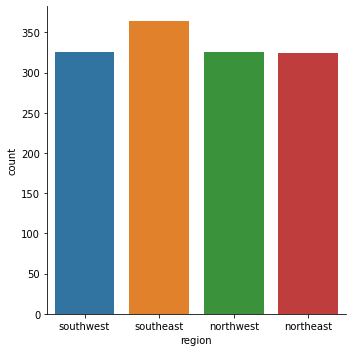

In [ ]:
sns.catplot(x='region', data = data, kind = 'count')

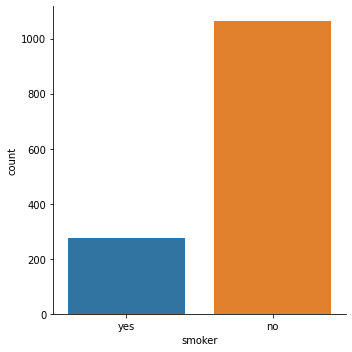

In [ ]:
sns.catplot(x='smoker', data = data, kind = 'count')

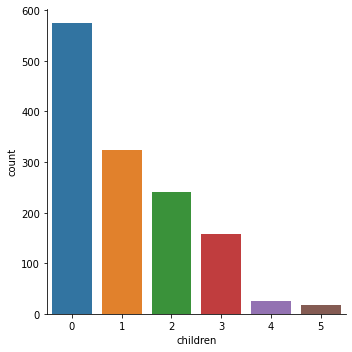

In [ ]:
sns.catplot(x='children', data = data, kind = 'count')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


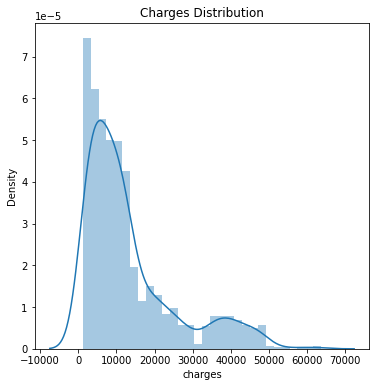

In [ ]:
# distribution of charges value
plt.figure(figsize=(6,6))
sns.distplot(data['charges'])
plt.title('Charges Distribution')
plt.show()

### **Data Preprocessing**

In [ ]:
# encoding the categorical features 
data.replace({'sex':{'male':0,'female':1}}, inplace=True)
data.replace({'smoker':{'yes':0,'no':1}}, inplace=True)
data.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


In [ ]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3,10600.54830
1334,18,1,31.920,0,1,2,2205.98080
1335,18,1,36.850,0,1,0,1629.83350
1336,21,1,25.800,0,1,1,2007.94500


### **Splitting to Features and Target**

In [ ]:
X = data.drop(columns='charges', axis=1)
y = data['charges']

### **Splitting the data into Training data & Testing Data**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.25, random_state=2)

In [ ]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(1003, 6) (335, 6) (1003,) (335,)


### **Build Model**

In [ ]:
# loading the Linear Regression model
regressor = LinearRegression()

In [ ]:
# fitting model
regressor.fit(X_train, Y_train)

LinearRegression()

In [ ]:
# prediction on training data
data_prediction =regressor.predict(X_train)

In [ ]:
# R squared value
r2_train = metrics.r2_score(Y_train, data_prediction)
print('R squared vale : ', r2_train)

R squared vale :  0.7498535567296758


In [ ]:
# prediction on test data
test_data_prediction =regressor.predict(X_test)

In [ ]:
# R squared value
r2_test = metrics.r2_score(Y_test, test_data_prediction)
print('R squared vale : ', r2_test)

R squared vale :  0.750068945071598
